In [28]:
import os
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2

def load_samples(csv_file):
    data_frame = pd.read_csv(os.path.join('data_files',csv_file))
    data_frame = data_frame[['Filename', 'Class', 'Label']]
    file_names = list(data_frame.iloc[:,0])
    # Get the labels present in the second column
    labels = list(data_frame.iloc[:,2])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples

data_path = "plant_diseases_train.csv"
samples = load_samples(data_path)

print(samples[0:5])

[['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|513.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|642.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|955.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|652.JPG', 24], ['dataset/plant_diseases/train/Soybean___healthy/Soybean|healthy|631.JPG', 24]]


In [29]:
root_dir = "/home/blackcerberus/Documents/Documents/DS_python/CNN_numpy/"

In [30]:
def generator(samples, batch_size=32,shuffle_data=True,resize=224):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_name = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(os.path.join(root_dir,img_name))

                # apply any kind of preprocessing

                # Add example to arrays
                X_train.append(img)
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch
            yield X_train, y_train



In [31]:
# this will create a generator object
train_datagen = generator(samples,batch_size=8)

x,y = next(train_datagen)
print ('x_shape: ', x.shape)
print ('labels: ', y)

x_shape:  (8, 256, 256, 3)
labels:  [26 13 23 19 15 12 16 30]


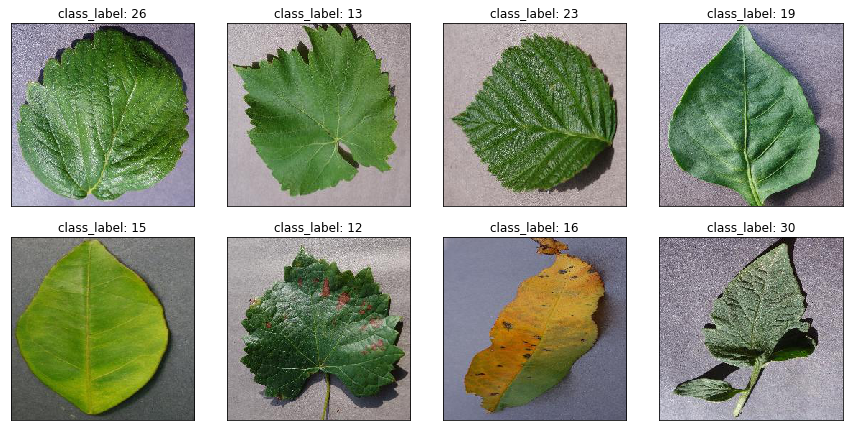

In [32]:
#### we can plot the data and see by ourselves
fig = plt.figure(1,figsize=(12,12))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    #x[i] = x[i][:,:,::-1] # converting BGR to RGB
    plt.imshow(x[i][:,:,::-1], interpolation='none')
    plt.title("class_label: {}".format(y[i]))
    plt.xticks([])
    plt.yticks([])
